# 문서 유사도 (Document Similarity)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os, glob

path = './data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, '*.data'))

filename_list = []
opinions_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    # display(df)
    
    filename = file_.split('\\')[-1]
    filename = filename.split('.')[0]
    filename_list.append(filename)

    opinions = df.to_string(index=False, header=False)
    opinions_list.append(opinions)    
    
document_df = pd.DataFrame({
    'filename': filename_list,
    'opinions': opinions_list
})

document_df

,filename,opinions
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...
5,buttons_amazon_kindle,...
6,comfort_honda_accord_2008,...
7,comfort_toyota_camry_2007,...
8,directions_garmin_nuvi_255W_gps,...
9,display_garmin_nuvi_255W_gps,...


In [4]:
import string
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    # 소문자 변환
    text = text.lower() 

    # 특수문자 변환(제거)
    punc_rem_dict = dict((ord(ch),None) for ch in string.punctuation)
    text = text.translate(punc_rem_dict)
    
    # 토큰화
    tokens = nltk.word_tokenize(text)

    #어근 분리
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, pos='v')for token in tokens]



In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lemmatize,
    stop_words='english',
    ngram_range=(1,2),
    min_df=0.05, 
    max_df=0.85
)
opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])


c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ljh10\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=5000, random_state=0)
document_df['cluster'] = kmeans.fit_predict(opinions_vecs)
document_df


,filename,opinions,cluster
0,accuracy_garmin_nuvi_255W_gps,...,2
1,bathroom_bestwestern_hotel_sfo,...,1
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,2
4,battery-life_netbook_1005ha,...,2
5,buttons_amazon_kindle,...,0
6,comfort_honda_accord_2008,...,3
7,comfort_toyota_camry_2007,...,3
8,directions_garmin_nuvi_255W_gps,...,2
9,display_garmin_nuvi_255W_gps,...,2


In [7]:
hotel_index = document_df[document_df['cluster'] == 1].index
print(hotel_index.shape)
print(hotel_index)

base_index = 1
document_df.iloc[base_index]

(15,)
Index([1, 13, 14, 15, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


filename                       bathroom_bestwestern_hotel_sfo
opinions                                                  ...
cluster                                                     1
Name: 1, dtype: object

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
# print(opinions_vecs[base_index].shape, opinions_vecs.shape)
opinion_sim = cosine_similarity(opinions_vecs[base_index], opinions_vecs)
opinion_sim

array([[0.00748211, 1.        , 0.00929825, 0.0057907 , 0.00951122,
        0.01189862, 0.04207734, 0.05068772, 0.00883856, 0.00840561,
        0.01333684, 0.0118808 , 0.01204711, 0.04527121, 0.05728026,
        0.06248841, 0.00753869, 0.02152493, 0.01696471, 0.02047214,
        0.06173425, 0.06124276, 0.00748295, 0.00877269, 0.04074639,
        0.01315832, 0.0105536 , 0.0222888 , 0.11626805, 0.00537765,
        0.41683399, 0.36028138, 0.51119681, 0.00799792, 0.01306653,
        0.01888393, 0.02248538, 0.01884263, 0.11499329, 0.15210166,
        0.1506946 , 0.04685638, 0.00708347, 0.00407049, 0.0150326 ,
        0.09851446, 0.08026128, 0.00684375, 0.00568624, 0.00898582,
        0.0080185 ]])

In [9]:
opinion_sorted_idx = opinion_sim.argsort()[:, ::-1]
opinion_sorted_idx = opinion_sorted_idx[:,1:]
opinion_sorted_idx = opinion_sorted_idx.reshape(-1) #1차원 변형

result_df = document_df.iloc[opinion_sorted_idx][['filename', 'cluster']]
opinion_sim = opinion_sim.reshape(-1)
result_df['similarity'] = opinion_sim[opinion_sorted_idx]
result_df

,filename,cluster,similarity
32,room_holiday_inn_london,1,0.511197
30,rooms_bestwestern_hotel_sfo,1,0.416834
31,rooms_swissotel_chicago,1,0.360281
39,service_holiday_inn_london,1,0.152102
40,service_swissotel_hotel_chicago,1,0.150695
28,price_holiday_inn_london,0,0.116268
38,service_bestwestern_hotel_sfo,1,0.114993
45,staff_bestwestern_hotel_sfo,1,0.098514
46,staff_swissotel_chicago,1,0.080261
15,free_bestwestern_hotel_sfo,1,0.062488


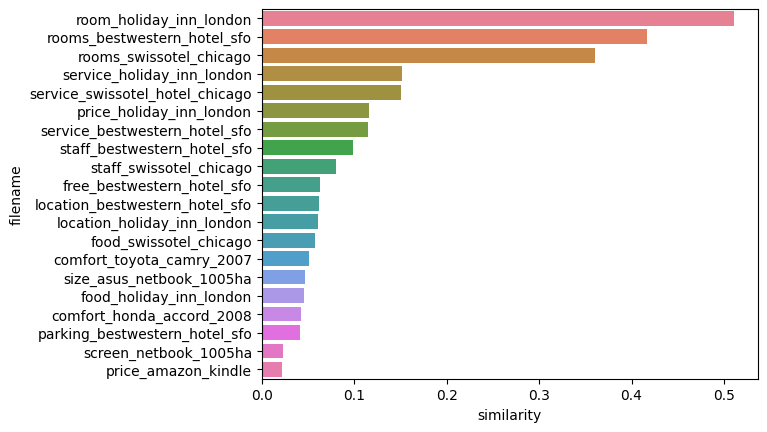

In [10]:
sns.barplot(x='similarity', y='filename', data=result_df.iloc[:20], hue='filename')
plt.show()

```
import pandas as pd
import numpy as np
import seaborn as sns
import os, glob
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
```
이 Jupyter Notebook은 문서 유사도(Document Similarity)를 계산하고 시각화하는 과정을 보여줍니다. 각 셀의 코드를 단계별로 설명하겠습니다.

1. **문서 유사도 (Document Similarity)**
    - 마크다운 셀로, 노트북의 제목을 설정합니다.

2. **필요한 라이브러리 임포트**
    ```python
    import matplotlib.pyplot as plt
    ```
    - 데이터 처리와 시각화를 위한 라이브러리를 임포트합니다.

3. **데이터 로드 및 전처리**
    ```python

    path = './data/OpinosisDataset1.0/topics'
    all_files = glob.glob(os.path.join(path, '*.data'))

    filename_list = []
    opinions_list = []

    for file_ in all_files:
         df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
         filename = file_.split('\\')[-1].split('.')[0]
         filename_list.append(filename)
         opinions = df.to_string(index=False, header=False)
         opinions_list.append(opinions)    

    document_df = pd.DataFrame({
         'filename': filename_list,
         'opinions': opinions_list
    })

    document_df
    ```
    - 지정된 경로에서 모든 `.data` 파일을 읽어와 파일명과 내용을 리스트에 저장하고, 이를 DataFrame으로 변환합니다.

4. **텍스트 전처리 함수 정의**
    ```python

    def lemmatize(text):
         text = text.lower()
         punc_rem_dict = dict((ord(ch), None) for ch in string.punctuation)
         text = text.translate(punc_rem_dict)
         tokens = nltk.word_tokenize(text)
         lemmatizer = WordNetLemmatizer()
         return [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    ```
    - 텍스트를 소문자로 변환하고, 특수문자를 제거한 후, 토큰화하고 어근을 추출하는 함수입니다.

5. **TF-IDF 벡터화**
    ```python

    tfidf_vectorizer = TfidfVectorizer(
         tokenizer=lemmatize,
         stop_words='english',
         ngram_range=(1,2),
         min_df=0.05, 
         max_df=0.85
    )
    opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])
    ```
    - TF-IDF 벡터라이저를 사용하여 문서의 텍스트를 벡터화합니다.

6. **K-Means 클러스터링**
    ```python

    kmeans = KMeans(n_clusters=4, max_iter=5000, random_state=0)
    document_df['cluster'] = kmeans.fit_predict(opinions_vecs)
    document_df
    ```
    - K-Means 알고리즘을 사용하여 문서를 4개의 클러스터로 분류합니다.

7. **특정 클러스터의 인덱스 추출**
    ```python
    hotel_index = document_df[document_df['cluster'] == 1].index
    print(hotel_index.shape)
    print(hotel_index)

    base_index = 1
    document_df.iloc[base_index]
    ```
    - 클러스터 1에 속하는 문서의 인덱스를 추출하고, base_index를 설정합니다.

8. **코사인 유사도 계산**
    ```python
    opinion_sim = cosine_similarity(opinions_vecs[base_index], opinions_vecs)
    opinion_sim
    ```
    - 코사인 유사도를 계산하여 문서 간의 유사도를 측정합니다.

9. **유사도 정렬 및 결과 저장**
    ```python
    opinion_sorted_idx = opinion_sim.argsort()[:, ::-1]
    opinion_sorted_idx = opinion_sorted_idx[:,1:]
    opinion_sorted_idx = opinion_sorted_idx.reshape(-1)

    result_df = document_df.iloc[opinion_sorted_idx][['filename', 'cluster']]
    opinion_sim = opinion_sim.reshape(-1)
    result_df['similarity'] = opinion_sim[opinion_sorted_idx]
    result_df
    ```
    - 유사도에 따라 문서를 정렬하고, 결과를 DataFrame으로 저장합니다.

10. **유사도 시각화**
     ```python
     sns.barplot(x='similarity', y='filename', data=result_df.iloc[:20], hue='filename')
     plt.show()
     ```
     - 상위 20개의 유사도를 바 플롯으로 시각화합니다.

이제 전체적인 흐름을 이해하셨기를 바랍니다. 추가 질문이 있으시면 언제든지 물어보세요.

In [26]:
# 호텔관련 리뷰 추출 (A)
hotel_index = document_df[document_df['cluster']==1].index
print(hotel_index)

# A에서 기준이 될 문서로 0번째 문서 지정
base_index = 1

# 호텔관련 리뷰 중 유사도 높은 순으로 정렬
opinion_sim = cosine_similarity(opinions_vecs[base_index], opinions_vecs)
print(opinion_sim.shape)
display(opinion_sim)
opinion_sorted_idx = opinion_sim.argsort()[:, ::-1]
opinion_sorted_idx = opinion_sorted_idx[:, 1:]
opinion_sorted_idx

Index([1, 13, 14, 15, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
(1, 51)


array([[0.00748211, 1.        , 0.00929825, 0.0057907 , 0.00951122,
        0.01189862, 0.04207734, 0.05068772, 0.00883856, 0.00840561,
        0.01333684, 0.0118808 , 0.01204711, 0.04527121, 0.05728026,
        0.06248841, 0.00753869, 0.02152493, 0.01696471, 0.02047214,
        0.06173425, 0.06124276, 0.00748295, 0.00877269, 0.04074639,
        0.01315832, 0.0105536 , 0.0222888 , 0.11626805, 0.00537765,
        0.41683399, 0.36028138, 0.51119681, 0.00799792, 0.01306653,
        0.01888393, 0.02248538, 0.01884263, 0.11499329, 0.15210166,
        0.1506946 , 0.04685638, 0.00708347, 0.00407049, 0.0150326 ,
        0.09851446, 0.08026128, 0.00684375, 0.00568624, 0.00898582,
        0.0080185 ]])

array([[32, 30, 31, 39, 40, 28, 38, 45, 46, 15, 20, 21, 14,  7, 41, 13,
         6, 24, 36, 27, 17, 19, 35, 37, 18, 44, 10, 25, 34, 12,  5, 11,
        26,  4,  2, 49,  8, 23,  9, 50, 33, 16, 22,  0, 42, 47,  3, 48,
        29, 43]], dtype=int64)

Index([1, 13, 14, 15, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


array([[ 9,  7,  8, 11, 12, 10, 13, 14,  3,  4,  5,  2,  1,  6]],
      dtype=int64)

array([0.51119681, 0.41683399, 0.36028138, 0.15210166, 0.1506946 ,
       0.11499329, 0.09851446, 0.08026128, 0.06248841, 0.06173425,
       0.06124276, 0.05728026, 0.04527121, 0.04074639])

C:\Users\ljh10\AppData\Local\Temp\ipykernel_32144\2949208194.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_sim_df['similarity'] = target_sim_val


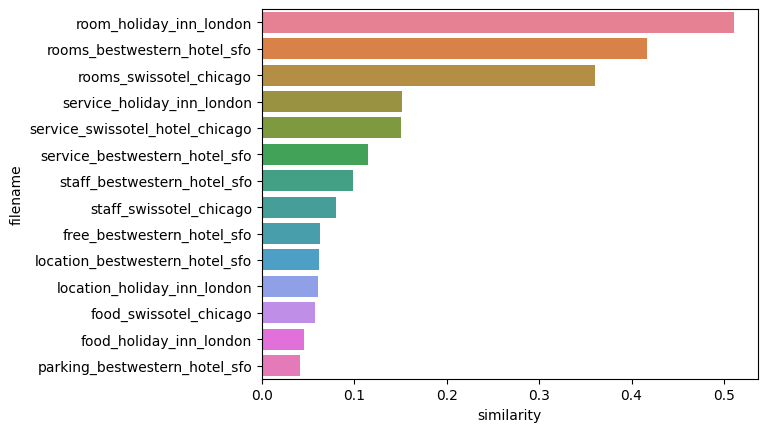

In [30]:
# 호텔관련 리뷰 추출 (A)
hotel_index = document_df[document_df['cluster']==1].index
print(hotel_index)

# A에서 기준이 될 문서로 0번째 문서 지정
base_index = hotel_index[0]

# 호텔관련 리뷰 중 유사도 높은 순으로 정렬
target_sim = cosine_similarity(opinions_vecs[base_index], opinions_vecs[hotel_index])

target_sorted_idx = target_sim.argsort()[:, ::-1]
target_sorted_idx = target_sorted_idx[:, 1:]  # 자기 자신 제거
display(target_sorted_idx)

hotel_sorted_idx = hotel_index[target_sorted_idx.reshape(-1)]

target_sim_val = np.sort(target_sim.reshape(-1))[::-1]
target_sim_val = target_sim_val[1:]
display(target_sim_val)

hotel_sim_df = document_df.iloc[hotel_sorted_idx]
hotel_sim_df['similarity'] = target_sim_val

# 시각화 '''' 
sns.barplot(x='similarity', y='filename', data=hotel_sim_df.iloc[:20], hue='filename')
plt.show()
